In [ ]:
#Cargamos los datos
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
datos = pd.read_csv('/content/faithful.txt',sep='\t')
datos.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


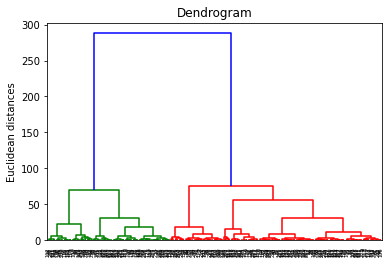

In [ ]:
#Utilizamos un conglomerado jearquico con el metodo Ward

dendrogram = sch.dendrogram(sch.linkage(datos, method  = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z2 = linkage(datos,"ward")

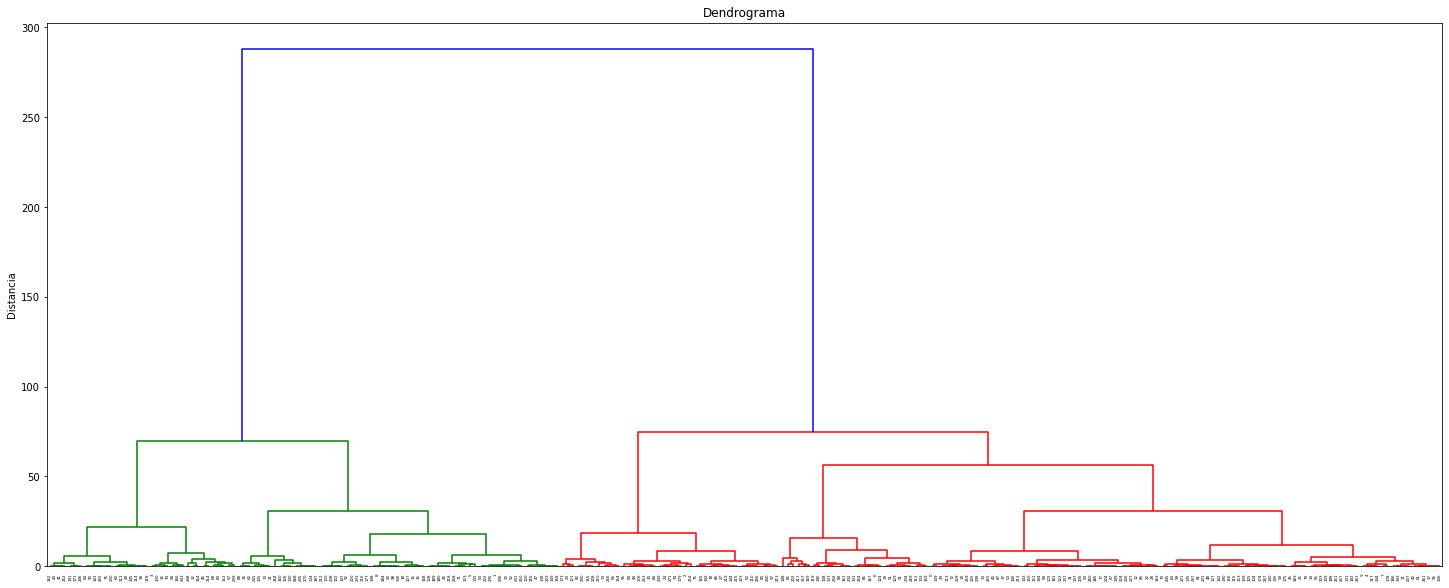

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma")
plt.ylabel("Distancia")
dendrogram(Z2, leaf_rotation=90., leaf_font_size=4.)
plt.show()

[288.23042277  74.79619445  69.51260113  56.15931195  31.00952823
  30.9436073   22.15622799  18.74352642  18.05767899  15.80536558]


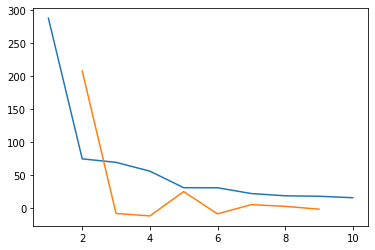

El número óptimo de cluster es 2


In [ ]:
#Si queremos utilizar el "codo" para saber el numero optimo de clusters

last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

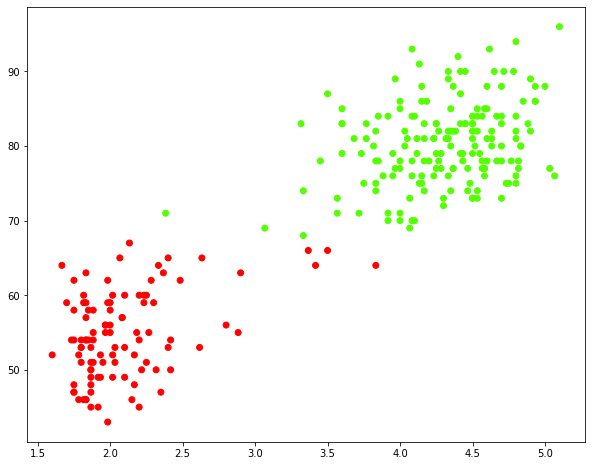

In [ ]:
#Graficamos los datos y pintamos de color los grupos, en este caso utilizamos ".iloc" para poder acceder a los datos.
clusters = fcluster(Z2, max_d, criterion="distance")
clusters
plt.figure(figsize=(10,8))
plt.scatter(datos.iloc[:,0], datos.iloc[:,1], c = clusters, cmap="prism")
plt.show()

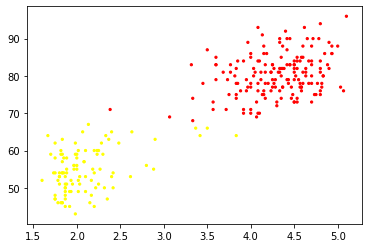

In [ ]:
#Visualizacion de algoritmo K-means.

from sklearn.cluster import KMeans
km = KMeans(2).fit(datos)
clust = km.predict(datos)

plt.scatter(datos.iloc[:,0], datos.iloc[:, 1], c = clust, s = 5, cmap="autumn")



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


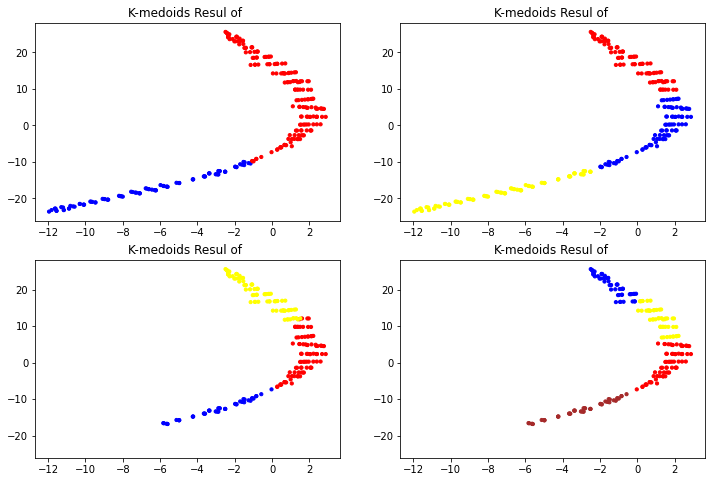

In [ ]:
from pyclust import KMedoids
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data_TSNE = TSNE(learning_rate=100).fit_transform(datos)

plt.figure(figsize=(12,8))
for i in range(2,6):
    k = KMedoids(n_clusters=i,distance='euclidean',max_iter=1000).fit_predict(data_TSNE)
    colors =([['red','blue','yellow','white','brown'][i]for i in  k])
    plt. subplot(219+i)
    plt.scatter(data_TSNE[:,0],data_TSNE[:,1],c=colors,s=10)
    plt.title('K-medoids Resul of '.format(str(i)))

plt.show()

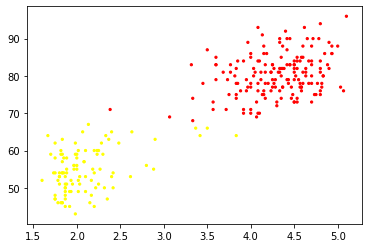

In [ ]:
#Cluster Spectral

from sklearn.cluster import SpectralClustering
clust = SpectralClustering(2).fit_predict(datos)
plt.scatter(datos.iloc[:,0], datos.iloc[:,1], c = clust, s = 5, cmap = "autumn")
